In [69]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.tsa.stattools import acf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

weather.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.

In [70]:
# Y is the target variable
Y = weather['temperature']
# X is the feature set which includes
# is_male and is_smoker variables
X = weather[['humidity','windspeed', 'windbearing', 'pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
np.set_printoptions(suppress=True)
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-32.49624543  -0.20141374   0.00404837  -0.00069176]

Intercept: 
 37.9264381852852


In [71]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X_c = sm.add_constant(X)

results = sm.OLS(Y, X_c).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:06:40   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.


## 1. Linearity of Models in their Coefficients

I'm guessing my model looks like this:   

$$ y = 37.9264381852852 + (-32.49624543)x_1 + (-0.20141374)x_2 + (0.00404837)x_3 + (-0.00069176)x_4 + \epsilon$$

so the my linearity of models test would be the function below. It looks like there is linearity in the model's coefficients, but I'm unsure of when/how exponents come into play. Should my model be a linear function? How do I know? If the models coefficients are not linear, what would my graph look like?


Coefficients: 
 [-27.6936108]

Intercept: 
 37.92643818527358


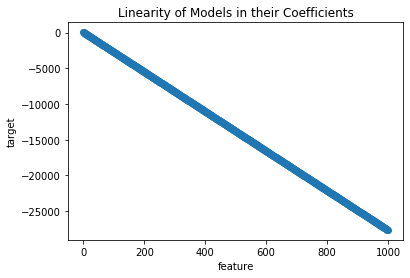

In [72]:
df = pd.DataFrame()

# data from 0 to 999
df["X"] = np.arange(0,1000,1)
# we take the square of X
df["X_sq"] = df["X"]**2
df["X_cub"] = df["X"]**3
df["X_qu"] = df["X"]**4

# this is our equation: Y = 1 + 2*X + 3*X^2
df["Y"] = 37.9264381852852 + (-32.49624543)*df["X"] + (-0.20141374)*df["X"] + (0.00404837)*df["X"] + 5*df["X"]

# we fit a linear regression where target is Y
# and features are X and X^2
lrm_example = linear_model.LinearRegression()
lrm_example.fit(df[["X"]],df["Y"])

# predictions of the linear regression
predictions = lrm_example.predict(df[["X"]])

# we print the estimated coefficients
print('\nCoefficients: \n', lrm_example.coef_)
print('\nIntercept: \n', lrm_example.intercept_)

# we plot the estimated Y and X
# the relationship should be quadratic
plt.scatter(df["X"], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Linearity of Models in their Coefficients')
plt.show()

## 2. The Error Term Should be Zero on Average

The mean of the errors is very close to zero, but it is not zero. I understand that because I've added a constant to the model, the error terms effectively average to zero so we meet this assumption.

In [73]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather model is: {}".format(np.mean(errors)))

Mean of the errors in the weather model is: -9.429408123883428e-18


## 3. Homoscedasticity

The p-values of both tests are zero, so we the errors are heteoscedastic.

In [74]:
bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


## 4. Low Multicollinearity

Before even testing for this, the model issued a warning that our condition number is large indicating there is high multicollinearity. The module doesn't specify how to tell if there is high multicollinearity other than checking the correlation matrix, which doesn't show much correlation between any of the variables. I would go back to the data and perform PCA to handle this.

In [77]:
X.corr()

,humidity,windspeed,windbearing,pressure
humidity,1.000,-0.225,0.001,0.005
windspeed,-0.225,1.000,0.104,-0.049
windbearing,0.001,0.104,1.000,-0.012
pressure,0.005,-0.049,-0.012,1.000


## 5.  Error Terms Should be Uncorrelated with One Another

While first graph seems random, the second shows correlation ranging from 0.7 to >0.95, indicating there is high correlation between the error terms. The module doesn't talk about how to handle correlation between error terms, so I'm unsure of how to handle this.

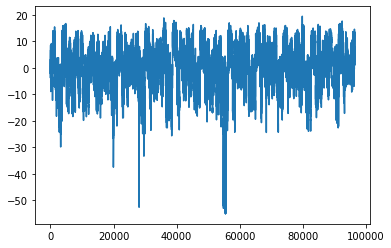

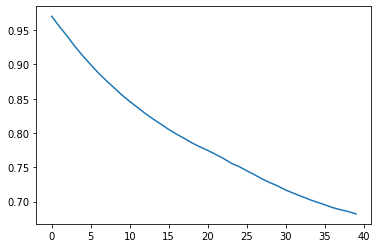

In [78]:
plt.plot(errors)
plt.show()

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

## 6. Features Shouldn't be Correlated with the Errors

The module doesn't talk about how to tell whether features are correlated with the errors, so I'm not sure if this is the case. Is there a test we can use?